**Build dataframes**

Builds a list of dataframes, one per degree, where each row  of dataframe dfs[i] is a curve E/K for K of degree i, with columns:
        - K: The defining polynomial for K
        - d: The degree of the number field over Q
        - r: The number of real places of K
        - s: The number of complex places of K
        - D_K: The discriminant of K
        - A: The coefficient of X in a short Weierstrass model of E
        - B: The constant coefficient in the same short Weierstrass model of E
        - j: The j invariant of E, represented as either a rational integer or as a minimal polynomial
        - j_deg: The degree of the minimal polynomial of j over Q
        - gmm: Whether or not E has a global minimal model
        - cm: Whether or not E has complex multiplication
        - ram: The number of ramified primes in K

In [21]:
import pandas as pd
from IPython.display import display

CSV_DIR="/home/abhijitm/research/nt/matschke_elliptic/egr/code/results/csv/"

dfs = {}
for i in range(2,6):
    dfs[i] = pd.read_csv(CSV_DIR+"curves_deg_"+str(i)+".csv")
    print(i, len(dfs[i]))

d_min = 2
d_max = 6



2 4203
3 743
4 840
5 42


**Number of Curves at Fixed K and j**

In [3]:
def jInvariant(K, A, B):
    P.<x> = QQ[]
    K.<theta_K> = NumberField(P(K))
    E = EllipticCurve([K(A),K(B)])
    return str(E.j_invariant())

for i in range(2,3):
    dfs[i]['j_true'] = dfs[i].apply(lambda x: jInvariant(x.K, x.A, x.B), axis = 'columns')
    with pd.option_context('display.max_rows', int(1500)):
        display(dfs[i].groupby(['K', 'j_true', 'ram']).agg({dfs[i].columns[0]:['count']}))
    
    
    

Unnamed: 0
                                                                           count
K              j_true                                             ram           
x^2 + 1385     343                                                3            4
x^2 + 1430     -23788477376                                       4            8
               64                                                 4            8
x^2 + 1729     -1                                                 4            8
x^2 + 1885     16974593                                           4            8
               4913                                               4            8
x^2 + 1997     -248*theta_K - 29263                               2            2
               248*theta_K - 29263                                2            2
x^2 + 2054     -23788477376                                       3            4
               64                                                 3            4
x^2 + 2470     -23788477376                                       4            8
               64                                                 4            8
x^2 + 2678     -23788477376                                       3            4
               64                                                 3            4
x^2 + 329      -1986121593                                        3            4
x^2 + 3302     -23788477376                                       3            4
               64                                                 3            4
x^2 + 3965     16974593                                           4            8
               4913                                               4            8
x^2 + 4810     16974593                                           4            8
               4913                                               4            8
x^2 + 4966     -23788477376                                       3            4
               64                                                 3            4
x^2 + 598      -23788477376                                       3            4
               64                                                 3            4
x^2 + 65       16974593                                           3            4
               4913                                               3            4
x^2 + 658      -1986121593                                        3            4
x^2 + 910      16974593                                           4            8
               4913                                               4            8
x^2 - 102      8000                                               3            4
x^2 - 1023     -1073545217*theta_K + 34336670432                  4            8
               -4112*theta_K - 129793                             4            8
               1073545217*theta_K + 34336670432                   4            8
               4112*theta_K - 129793                              4            8
x^2 - 1027     59319                                              3            4
x^2 - 1043     -3375                                              3            4
               16581375                                           3            4
x^2 - 1046     8000                                               2            2
x^2 - 106      -25777*theta_K + 264235                            2            2
               25777*theta_K + 264235                             2            2
x^2 - 1094     8000                                               2            2
x^2 - 1106     -285886*theta_K + 9682653                          3            4
               -3375                                              3            4
               16581375                                           3            4
               285886*theta_K + 9682653                           3            4
x^2 - 1126     8000                                               2            2
x^2 - 1142     8000 

In [ ]:
def jInvariant(K, A, B):
    P.<x> = QQ[]
    K.<theta_K> = NumberField(P(K))
    E = EllipticCurve([K(A),K(B)])
    return str(E.j_invariant())

for i in range(d_min, d_max):
    dfs[i]['j_true'] = dfs[i].apply(lambda x: jInvariant(x.K, x.A, x.B), axis = 'columns')
    with pd.option_context('display.max_rows', int(850)):
        display(dfs[i].groupby(['K', 'j_true', 'ram']).agg({dfs[i].columns[0]:['count']}))
    
    
    

**Complex Multiplication**

In [17]:
for i in range(2,6):
    print(dfs[i].groupby('cm').size())

cm
False    1895
True     2308
dtype: int64
cm
False    743
dtype: int64
cm
False    323
True     517
dtype: int64
cm
False    42
dtype: int64


**Signature**

In [3]:
 for i in range(2,6):
        print(dfs[i].groupby('s').size())

s
0    3615
1     588
dtype: int64
s
0    484
1    259
dtype: int64
s
0    360
1    178
2    302
dtype: int64
s
1    36
2     6
dtype: int64


**Has Global Minimal Model**

In [5]:
 for i in range(2,6):
        print(dfs[i].groupby('gmm').size())

gmm
False    2290
True     1913
dtype: int64
gmm
False    211
True     532
dtype: int64
gmm
False     68
True     772
dtype: int64
gmm
True    42
dtype: int64


**Print Good D**

In [14]:
from tqdm import tqdm 
A_RANGE = 5000000

print("Starting")
good_D = set()
for A in tqdm(range(-A_RANGE, A_RANGE)):
    if not ((A % 2 == 0) and (A % 16 != 0)  and (A % 16 != 4)):
        if not ((A % 3 == 0) and (A % 27 != 12)):
            D = squarefree_part(A**3-1728)
            if D == 0:
                continue
            elif D > 0:
                    good_D.add(D) 
            else:
                    good_D.add(-D)
                        
    
    

  0%|          | 332/10000000 [00:00<50:37, 3292.08it/s]

Starting


  2%|▏         | 168914/10000000 [00:26<24:41, 6637.53it/s]<ipython-input-14-6f0ecbcb9b9d>:9: RuntimeWarning: cypari2 leaked 37208 bytes on the PARI stack
  D = squarefree_part(A**Integer(3)-Integer(1728))
  2%|▏         | 169405/10000000 [00:26<25:47, 6352.76it/s]


KeyboardInterrupt: 

[a == 2.229150779051422, b == 0.37576809153862145]

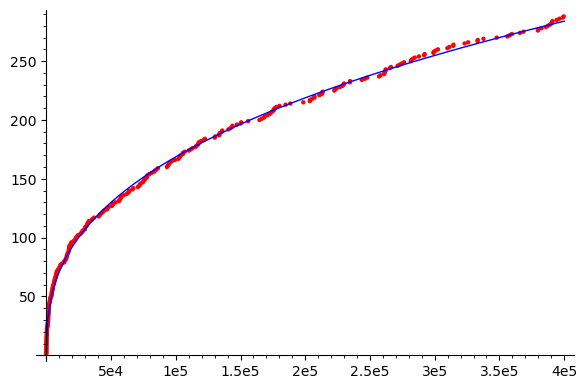

In [27]:
import pickle

D_RANGE = 400000
with open("good-d-3000000.pickle", 'rb') as fin:
    good_d = pickle.load(fin)
good_d = [abs(d) for d in good_d]
good_d.sort()
plot_d = []
ct = 0
for d in good_d:
    if d < D_RANGE:
        ct += 1
        plot_d.append((d,ct))

plt = plot([])
plt += list_plot(plot_d, color='red')

var('a','b')
model(x) = a*(x**b)
sol = find_fit(plot_d, model)
show(sol)
g(x) = model(a = sol[0].rhs(), b = sol[1].rhs())
plt += plot(g(x),  x, [1,D_RANGE], color = 'blue')
show(plt)


In [12]:
A_RANGE = 200000
SUM_RANGE = 10000
DISPLAY_RANGE = 50

pos_good_D = set()
neg_good_D = set()
for A in range(-A_RANGE, A_RANGE):
    if not ((A % 2 == 0) and (A % 16 != 0)  and (A % 16 != 4)):
        if not ((A % 3 == 0) and (A % 27 != 12)):
            D = squarefree_part(A**3-1728)
            if D == 0:
                continue
            elif D > 0:
                    pos_good_D.add(D) 
            elif D < 0:
                    neg_good_D.add(-D)

pos_good_D = list(pos_good_D)
neg_good_D = list(neg_good_D)
pos_good_D.sort()
neg_good_D.sort()
print("The number of positive good d up to 10000 is roughly", len(pos_good_D))
print("The number of negative good d up to 10000 is roughly", len(neg_good_D))


    
    

The number of positive good d up to 10000 is roughly 87956
The number of negative good d up to 10000 is roughly 87968
{0: 0.000000000000000, 1: 0.00391911325124601, 2: 0.250100226085176, 3: 0.000283428933860273, 4: 0.000000000000000, 5: 0.0163140424879989, 6: 0.00112254070146317, 7: 0.0779566865624910}
{0: 0.000000000000000, 1: 0.0720362398964042, 2: 0.000818007797486940, 3: 0.00637599046154052, 4: 0.000000000000000, 5: 0.0944859078160978, 6: 0.0101991920721527, 7: 0.00111103584740151}
[0.000000000000000, 0.0156701707655046, 1.00000000000000, 0.00113326140602426, 0.000000000000000, 0.0652300189542524, 0.00448836340148235, 0.311701783651892]
[0.000000000000000, 88.0630235038246, 1.00000000000000, 7.79453506571534, 0.000000000000000, 115.507343703049, 12.4683311130851, 1.35822158519125]


In [19]:
pos_mod_eight = {k:[] for k in range(0,8)}
for d in pos_good_D:    
    pos_mod_eight[d%8].append(d)

neg_mod_eight = {k:[] for k in range(0,8)}
for d in neg_good_D:
    neg_mod_eight[8-d%8].append(d)
    
pos_sum = {k:0.0 for k in range(0,8)}
neg_sum = {k:0.0 for k in range(0,8)}

D_FLR = 2500
for k in range(0,8):
    for d in pos_mod_eight[k]:
        if d > D_FLR:
            pos_sum[k] += 1/(d*2**len(factor(d)))
    for d in neg_mod_eight[k]:
        if d > D_FLR:
            neg_sum[k] += 1/(d*2**len(factor(d)))



print([len(pos_mod_eight[k]) for k in range(0,8)])
print([len(neg_mod_eight[k]) for k in range(0,8)])

print([pos_sum[k]/pos_sum[2] for k in range(0,8)])
print([neg_sum[k]/neg_sum[2] for k in range(0,8)])

[0, 17590, 4398, 17591, 0, 26387, 4398, 17592]
[0, 17594, 4398, 17594, 0, 26390, 4398, 17594]
[0.000000000000000, 1.02149358811316, 1.00000000000000, 1.35419619390062, 0.000000000000000, 7.27448617045692, 0.691418452724627, 1.61554630107511]
[0.000000000000000, 1.94380697183046, 1.00000000000000, 3.61997431461225, 0.000000000000000, 11.5116507679421, 3.74495470590096, 2.51244477208824]


[a == 0.13777659396080166]

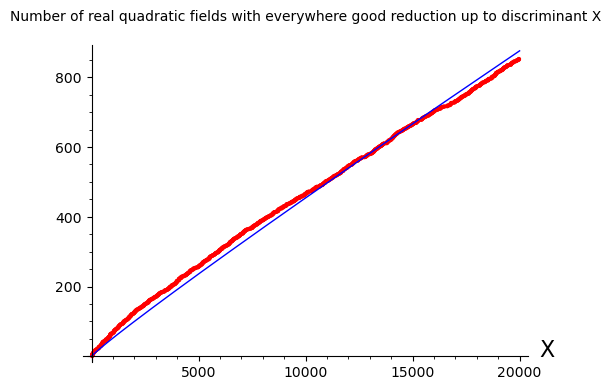

In [39]:
df = dfs[2]
count = 0
m_egr_pts = []
df = df[df.D_K > 0]['D_K'].drop_duplicates().sort_values()
m_egr = df.tolist()

for m in m_egr:
    count += 1
    m_egr_pts.append((m, count))

plt = plot([])
plt += list_plot(m_egr_pts, color = 'red')
var('a','b')
model(x) = a*x/sqrt(log(x))
sol = find_fit(m_egr_pts, model)
show(sol)
g(x) = model(a = sol[0].rhs())
plt += plot(g(x),  x, [1,20000], color = 'blue')
show(plt, axes_labels = ['X',""], title = 'Number of real quadratic fields with everywhere good reduction up to discriminant X')


    

In [23]:
df = dfs[2]
df = df.drop_duplicates(subset=['K'])
df = df[['K', 'r']]
display(df.groupby(by = 'r').size())

r
0    103
2    852
dtype: int64

In [22]:
df = dfs[2]
df = df.groupby('K').filter(lambda g: (g.j_deg != 1).all())
df = df.drop_duplicates(subset=['K'])
df = df[['K', 'r']]
with pd.option_context('display.max_rows', int(850)):
    display(df)
    display(df.groupby(by = 'r').size())

,K,r
14,x^2 - x - 7,2
26,x^2 - x - 10,2
58,x^2 - x - 27,2
79,x^2 - x - 57,2
85,x^2 - x - 64,2
105,x^2 - x - 84,2
111,x^2 - x - 87,2
122,x^2 - 106,2
128,x^2 - x - 115,2
150,x^2 - x - 127,2


r
0      6
2    124
dtype: int64

**Explore Irrational j-invariants**

In [5]:
def check_conditions(K, D_K, m):
    P.<x> = QQ[]
    K.<theta_K> = NumberField(P(K))
    D_list = []
    for D in range(-abs(D_K),abs(D_K)+1):
        if D in range(-1,2):
            continue
        if D_K % D == 0:
            if D % 4 == 1:
                eps_D = 1
            else:
                eps_D = -1
            if (eps_D*D).is_norm(K):
                if not ((D % 8 == 3) and m % 4 != 1):
                    if not ((D % 8 == 5) and m % 4 != 1):
                        if not ((D % 2 == 0) and ((m-D) % 16 != 4)):
                            D_list.append(D)
    return D_list
    

df = dfs[2]
with pd.option_context('display.max_rows', int(2000)):
    print("Starting")
    df['factored_D_K'] = df['D_K'].apply(lambda x: factor(x))
    print("Made factored")
    df['m'] = df['D_K']. apply(lambda x: x if (factor(x)[0][0] != 2) else x/4)
    print("Made m")
    df['conds'] = df.apply(lambda x: check_conditions(x.K, x.D_K, x.m), axis = 'columns')
    print("Made conds")

    df = df.groupby('K').filter(lambda g: (g.j_deg != 1).all())
    print("Filtered out irrats")
    df = df.drop_duplicates(subset=['K','j'])
    display(df[['K', 'factored_D_K', 'm', 'conds']])
    print("Done")

    

Starting
Made factored
Made m


KeyboardInterrupt: 

**Add a Column**

In [9]:
for i in range(d_min, d_max):
    dfs[i]['ram'] = dfs[i]['D_K'].apply(lambda x: len(factor(x)))
    dfs[i].to_csv(CSV_DIR+"curves_deg_"+str(i)+".csv")

**Harmonic sum of Pell part**

/usr/lib/python3.8/site-packages/sage/plot/graphics.py:2853: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  subplot.set_xlim([xmin, xmax])


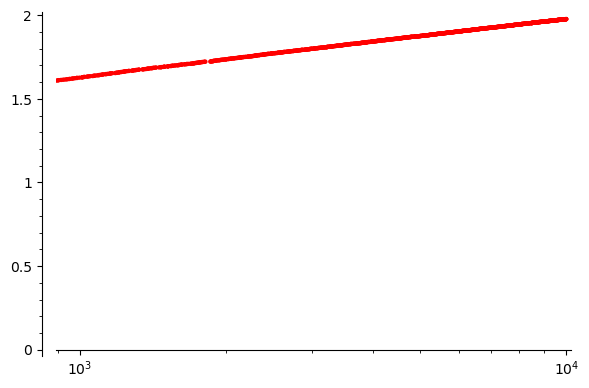

In [48]:
D_RANGE = 10000

D_harm = [(0.0,0.0)]
for D in range(D_RANGE):
    if (Integer(D).is_squarefree()) and (D != 1):
        P.<x> = QQ[]
        K.<theta_K> = NumberField(P("x^2 - " + str(D)))
        if (-1).is_norm(K):
            D_harm.append((D, D_harm[-1][1]+1.0/float(D)))

plt = plot([])
plt += list_plot(D_harm, color='red', scale="semilogx")
show(plt)      

    
    

[2, 7, 37, 65, 79, 254, 469, 485, 813, 877, 1101, 1339, 1406, 1495, 1957, 2170, 2869, 4069, 4355, 4597, 4886, 5063, 5131, 5917, 5954, 6162, 7441, 7973, 9269, 9709, 10439, 11137, 13897, 14746, 15061, 15598, 15757, 17791, 17822, 18655, 19429, 21026, 22661, 24362, 27910, 28063, 30109, 31003, 32741, 35077, 37037, 40469, 41147, 43922, 46949, 50626, 51454, 56429, 59781, 62013, 63973, 66607, 67193, 71669, 72751, 74533, 75021, 75866, 77779, 78131, 83885, 85157, 86149, 93165, 94357, 95015, 99465, 102095, 102785, 103279, 103894, 115178, 115921, 117622, 121538, 133597, 135605, 135902, 143327, 143749, 147149, 164647, 168773, 175589, 180079, 188461, 198493, 203651, 210949, 213290]
[7, 11, 19, 26, 43, 67, 91, 157, 182, 329, 370, 397, 453, 533, 1069, 1258, 1358, 1385, 1501, 1603, 1727, 1729, 1739, 1853, 1879, 1963, 2071, 2555, 2778, 3059, 3155, 3653, 4123, 4154, 4763, 5514, 6466, 6641, 6886, 7259, 7609, 8027, 8587, 10717, 12194, 13895, 15991, 16289, 16651, 17174, 17353, 17498, 19123, 21979, 22909, 23

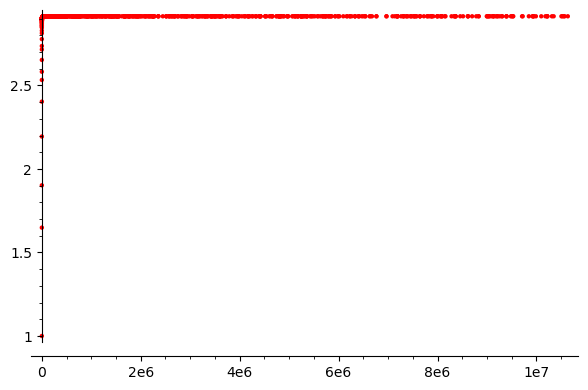

In [2]:
A_RANGE = 51200
SUM_RANGE =  800
DISPLAY_COUNT = 100
pos_good_D_set = set()
neg_good_D_set = set()
for A in range(-A_RANGE, A_RANGE):
            if A == 0: 
                continue
            else:
                if not ((A % 2 == 0) and (A % 16 != 0)  and (A % 16 != 4)):
                    if not ((A % 3 == 0) and (A % 27 != 12)):
                        D = squarefree_part(A**3-1728)
                        if D == 0: 
                            continue
                        elif D > 0:
                                pos_good_D_set.add(D) 
                        elif D < 0:
                                neg_good_D_set.add(-D)

                    
pos_good_D = sorted(list(pos_good_D_set))
neg_good_D = sorted(list(neg_good_D_set))

print(pos_good_D[:DISPLAY_COUNT])
print(neg_good_D[:DISPLAY_COUNT])
pos_idx = 0
neg_idx = 0
D_harm = [(0,0.0)]
k = 0
while neg_idx + pos_idx < SUM_RANGE and (pos_idx < len(pos_good_D) or neg_idx < len(neg_good_D)):
    if pos_idx == len(pos_good_D):
        D_harm.append((neg_good_D[neg_idx], D_harm[-1][1]+1.0/((2**(len(factor(neg_good_D[neg_idx]))-1))*(float(neg_good_D[neg_idx])))))
        neg_idx += 1
            
    elif neg_idx == len(neg_good_D):
        D_harm.append((pos_good_D[pos_idx], D_harm[-1][1]+1.0/((2**(len(factor(pos_good_D[pos_idx]))-1))*(float(pos_good_D[pos_idx])))))
        pos_idx += 1
    elif pos_good_D[pos_idx] > neg_good_D[neg_idx]:
        D_harm.append((neg_good_D[neg_idx], D_harm[-1][1]+1.0/((2**(len(factor(neg_good_D[neg_idx]))-1))*(float(neg_good_D[neg_idx])))))
        neg_idx += 1
    else:
        D_harm.append((pos_good_D[pos_idx], D_harm[-1][1]+1.0/((2**(len(factor(pos_good_D[pos_idx]))-1))*(float(pos_good_D[pos_idx])))))
        pos_idx += 1   
    k += 1
    if k <= DISPLAY_COUNT: 
        print(D_harm[-1])
         


D_harm = [(D,exp(harmsum)) for (D,harmsum) in D_harm]
plt = plot([])
plt += list_plot(D_harm, color='red')
show(plt)




    
    

In [4]:
D_RANGE = 100

#E = EllipticCurve([0,1728])
#E.gens(descent_second_limit = 30)
for D in range(-D_RANGE, D_RANGE):
    if D != 0:
        E = EllipticCurve([0,1728*(D**3)])
        try:
            l = len(E.global_integral_model().integral_points(verbose = True))
            if l > 1:
                print(D)
        except:
            print("exception", D)
print("done")


Total number of integral points: 1
Using mw_basis  [(1609641/100 : -2041767189/1000 : 1)]
e1,e2,e3:  -594.000000000000 - 1028.83817969591*I -594.000000000000 + 1028.83817969591*I 1188.00000000000
Minimal and maximal eigenvalues of height pairing matrix: 9.74174258750195,9.74174258750195
x-coords of points on non-compact component with  1188 <=x<= 2375
[1188]
starting search of remaining points using coefficient bound 2 and |x| bound 2.32591651593006e21
x-coords of extra integral points:
[1188]
Total number of integral points: 1
Using mw_basis  [(1960 : 76832 : 1)]
e1,e2,e3:  -588.000000000000 - 1018.44587485050*I -588.000000000000 + 1018.44587485050*I 1176.00000000000
Minimal and maximal eigenvalues of height pairing matrix: 1.95970403262893,1.95970403262893
x-coords of points on non-compact component with  1176 <=x<= 2351
[1176, 1705, 1960]
starting search of remaining points using coefficient bound 3 and |x| bound 1.25557491953011e12
x-coords of extra integral points:
[1176, 1705, 19

Minimal and maximal eigenvalues of height pairing matrix: 11.0915560592973,11.0915560592973
x-coords of points on non-compact component with  912 <=x<= 1823
[912]
starting search of remaining points using coefficient bound 2 and |x| bound 3.95037832618576e23
x-coords of extra integral points:
[912]
Total number of integral points: 1
Total number of integral points: 1
Using mw_basis  [(82152136/38025 : -718292308384/7414875 : 1)]
e1,e2,e3:  -444.000000000000 - 769.030558560582*I -444.000000000000 + 769.030558560582*I 888.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 12.7795956230536,12.7795956230536
x-coords of points on non-compact component with  888 <=x<= 1775
[888]
starting search of remaining points using coefficient bound 2 and |x| bound 3.29216723539120e26
x-coords of extra integral points:
[888]
Total number of integral points: 1
Total number of integral points: 1
Using mw_basis  [(1440 : 48384 : 1)]
e1,e2,e3:  -432.000000000000 - 748.245948869755*I -432

x-coords of extra integral points:
[600, 1000, 3300]
Total number of integral points: 3
-50
Total number of integral points: 1
Total number of integral points: 1
Using mw_basis  [(259838670737929088937385/39980347387286114116 : -132407845858630923483525456541790699/252795794661235200669477924664 : 1)]
e1,e2,e3:  -282.000000000000 - 488.438327734423*I -282.000000000000 + 488.438327734423*I 564.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 50.1174898175320,50.1174898175320
x-coords of points on non-compact component with  564 <=x<= 1127
[564]
starting search of remaining points using coefficient bound 1 and |x| bound 7.68538911596947e25
x-coords of extra integral points:
[564]
Total number of integral points: 1
Using mw_basis  [(124729/225 : -4958317/3375 : 1)]
e1,e2,e3:  -276.000000000000 - 478.046022889010*I -276.000000000000 + 478.046022889010*I 552.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 9.14575106111503,9.14575106111503
x-coord

Minimal and maximal eigenvalues of height pairing matrix: 7.70159763860683,7.70159763860683
x-coords of points on non-compact component with  264 <=x<= 527
[264]
starting search of remaining points using coefficient bound 2 and |x| bound 1.47668150132461e17
x-coords of extra integral points:
[264]
Total number of integral points: 1
Using mw_basis  [(504 : -10584 : 1)]
e1,e2,e3:  -126.000000000000 - 218.238401753679*I -126.000000000000 + 218.238401753679*I 252.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 0.526895372480598,0.526895372480598
x-coords of points on non-compact component with  252 <=x<= 503
[252, 288, 504]
starting search of remaining points using coefficient bound 6 and |x| bound 1.01820945210207e12
x-coords of extra integral points:
[252, 288, 504, 1008, 3052, 5544]
Total number of integral points: 6
-21
Total number of integral points: 1
Using mw_basis  [(4694596/2025 : 10166949856/91125 : 1)]
e1,e2,e3:  -114.000000000000 - 197.453792062852*I -11

Total number of integral points: 3
21
Total number of integral points: 1
Using mw_basis  [(987505/6084 : -2386987127/474552 : 1)]
e1,e2,e3:  138.000000000000 - 239.023011444505*I 138.000000000000 + 239.023011444505*I -276.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 11.7269943526571,11.7269943526571
x-coords of points on non-compact component with  -276 <=x<= 551
[-276]
starting search of remaining points using coefficient bound 2 and |x| bound 1.51852627588402e24
x-coords of extra integral points:
[-276]
Total number of integral points: 1
Using mw_basis  [(144 : 5184 : 1)]
e1,e2,e3:  144.000000000000 - 249.415316289918*I 144.000000000000 + 249.415316289918*I -288.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 0.653234677542977,0.653234677542977
x-coords of points on non-compact component with  -288 <=x<= 575
[-288, -252, 144, 288]
starting search of remaining points using coefficient bound 6 and |x| bound 1.09924308067727e14
x-coords o

x-coords of extra integral points:
[-660]
Total number of integral points: 1
Total number of integral points: 1
Using mw_basis  [(10089/4 : 1023435/8 : 1)]
e1,e2,e3:  342.000000000000 - 592.361376188556*I 342.000000000000 + 592.361376188556*I -684.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 3.69718535309909,3.69718535309909
x-coords of points on non-compact component with  -684 <=x<= 1367
[-684]
starting search of remaining points using coefficient bound 3 and |x| bound 4.51542216979776e18
x-coords of extra integral points:
[-684]
Total number of integral points: 1
Total number of integral points: 1
Using mw_basis  [(6204 : 489024 : 1)]
e1,e2,e3:  354.000000000000 - 613.145985879383*I 354.000000000000 + 613.145985879383*I -708.000000000000
Minimal and maximal eigenvalues of height pairing matrix: 5.76910591414560,5.76910591414560
x-coords of points on non-compact component with  -708 <=x<= 1415
[-708]
starting search of remaining points using coefficient boun

starting search of remaining points using coefficient bound 2 and |x| bound 6.07410510353606e24
x-coords of extra integral points:
[-1104]
Total number of integral points: 1
Using mw_basis  [(83700/121 : 55215216/1331 : 1)]
e1,e2,e3:  558.000000000000 - 966.484350623434*I 558.000000000000 + 966.484350623434*I -1116.00000000000
Minimal and maximal eigenvalues of height pairing matrix: 5.33217894942572,5.33217894942572
x-coords of points on non-compact component with  -1116 <=x<= 2231
[-1116]
starting search of remaining points using coefficient bound 2 and |x| bound 4.77799019328586e13
x-coords of extra integral points:
[-1116]
Total number of integral points: 1
Total number of integral points: 1
Using mw_basis  [(2982316/729 : 5205700864/19683 : 1)]
e1,e2,e3:  570.000000000000 - 987.268960314260*I 570.000000000000 + 987.268960314260*I -1140.00000000000
Minimal and maximal eigenvalues of height pairing matrix: 10.7511983868238,10.7511983868238
x-coords of points on non-compact component

In [56]:
D_RANGE = 10000

units = []
unit_size_sums = []
unit_size_sum = 0.0
smol_unit_size_sums = []
smol_unit_size_sum = 0.0
prev = 1
for D in range(1, D_RANGE):
    if (Integer(D).is_squarefree()) and (D != 1):
        P.<x> = QQ[]
        K.<theta_K> = NumberField(P("x^2 - " + str(D)))
        unit_size = abs(K.real_embeddings()[0](K.units()[0]))
        unit_size_sum += unit_size
        units.append((D,unit_size))
        unit_size_sums.append((D, log(unit_size_sum)))
        
        if unit_size <= 10*prev:
            smol_unit_size_sum += unit_size
            smol_unit_size_sums.append((D, smol_unit_size_sum))
        prev = unit_size
        
print("done")



    
    

done


[c == 2.6193806628777696, d == 0.49400084914238995, e == -14.550287557162658]

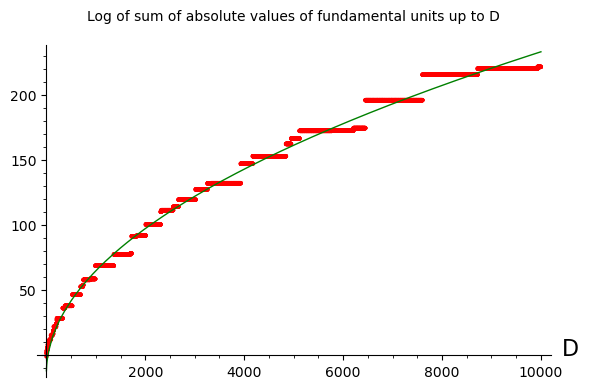

In [59]:
plt = plot([]) 
plt += list_plot(unit_size_sums, color='red')
var('c','d','e')
model_2(D) = c*D^d+e
sol_2 = find_fit(unit_size_sums, model_2)
show(sol_2)
g(D) = model_2(c = sol_2[0].rhs(), d = sol_2[1].rhs(), e = sol_2[2].rhs())
plt += plot(g(D),  D, [1,D_RANGE], color = 'green')
show(plt, axes_labels = ['D',''], title = 'Log of sum of absolute values of fundamental units up to D')

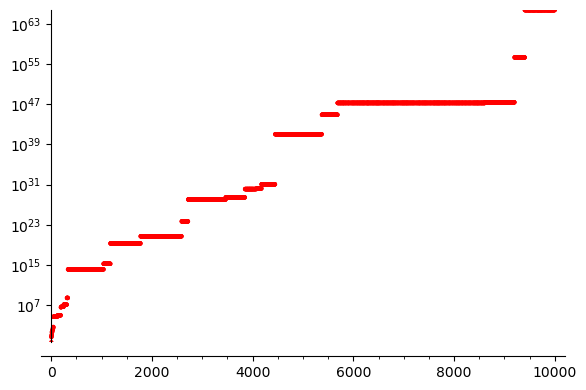

In [60]:
plt2 = plot([]) 
plt2 += list_plot(smol_unit_size_sums, color='red', scale = 'semilogy')
show(plt2)

In [66]:
units = [(D,log(unit_size)) for (D, unit_size) in units]
print(units[:50])
plt3 = plot([])
plt3 += list_plot(units, color = 'red')
show(plt3)

[(2, -0.126273694098899 + 3.14159265358979*I), (3, 0.275324453324399), (5, -0.731447721077975), (6, 0.829613118624087 + 3.14159265358979*I), (7, 1.01836322590139), (10, 0.597982542741509), (11, 1.09635068187113 + 3.14159265358979*I), (13, 0.177948021220638), (14, 1.22380025899431), (15, 0.724373072481364 + 3.14159265358979*I), (17, 0.739416335015511), (19, 1.76283464531135 + 3.14159265358979*I), (21, 0.449034835811981), (22, 1.78780908797501), (23, 1.35345260118902), (26, 0.838302526815570 + 3.14159265358979*I), (29, 0.499095785228669), (30, 1.12783767120352), (31, 2.08189012722022), (33, 1.34238648289739), (34, 1.44651680746623), (35, 0.907406879167495 + 3.14159265358979*I), (37, 0.912997255387586), (38, 1.45951750559836), (39, 1.36395231736301), (41, 1.42530522884999), (42, 1.18068799142142), (43, 2.18024900192421), (46, 2.37888092240788), (47, 1.51825194307914), (51, 1.52715790759006 + 3.14159265358979*I), (53, 0.675858830359726), (55, 1.64514322054037 + 3.14159265358979*I), (57, 1.

ValueError: Axis limits cannot be NaN or Inf

In [6]:
from tqdm import tqdm
E = EllipticCurve([-7, 6])
D = 500
count = 0
plot_d = []
for d in tqdm(range(D)):
    try:
        if is_squarefree(d) is True and len(E.quadratic_twist(d).integral_points()) > 3:
            count += 1
            plot_d.append((d, count))
    except RuntimeError:
            print(f"Wasn't able to compute integral points at {d}")
                            
plt = plot([])
var('a','b')
model(x) = a*x^b
sol = find_fit(plot_d, model)
show(sol)
f(x) = model(a = sol[0].rhs(), b = sol[1].rhs())
plt += list_plot(plot_d, color = 'red')
plt += plot(f(x), x, [1,D])


        
        

 22%|██▏       | 110/500 [00:18<16:11,  2.49s/it]

Wasn't able to compute integral points at 109


 29%|██▊       | 143/500 [00:38<10:05,  1.70s/it]

Wasn't able to compute integral points at 142


 30%|███       | 150/500 [00:49<10:19,  1.77s/it]

Wasn't able to compute integral points at 149


 37%|███▋      | 184/500 [01:12<14:47,  2.81s/it]

Wasn't able to compute integral points at 183


 44%|████▍     | 222/500 [01:42<10:56,  2.36s/it]

Wasn't able to compute integral points at 219


 61%|██████    | 303/500 [02:17<24:37,  7.50s/it]

Wasn't able to compute integral points at 302


 62%|██████▏   | 311/500 [02:35<13:43,  4.36s/it]

Wasn't able to compute integral points at 310


 64%|██████▎   | 318/500 [02:41<05:04,  1.68s/it]

Wasn't able to compute integral points at 317


 68%|██████▊   | 338/500 [02:50<02:23,  1.13it/s]

Wasn't able to compute integral points at 337


 75%|███████▍  | 374/500 [02:58<01:05,  1.93it/s]

Wasn't able to compute integral points at 373


 77%|███████▋  | 383/500 [03:13<08:51,  4.55s/it]

Wasn't able to compute integral points at 382


 80%|███████▉  | 399/500 [03:41<13:00,  7.72s/it]

Wasn't able to compute integral points at 398


 80%|████████  | 402/500 [03:58<10:11,  6.24s/it]

Wasn't able to compute integral points at 401


 82%|████████▏ | 408/500 [04:15<11:01,  7.19s/it]

Wasn't able to compute integral points at 407


 82%|████████▏ | 411/500 [04:35<10:25,  7.03s/it]

Wasn't able to compute integral points at 410


 84%|████████▍ | 422/500 [04:53<04:30,  3.47s/it]

Wasn't able to compute integral points at 421


 92%|█████████▏| 462/500 [05:06<00:30,  1.23it/s]

Wasn't able to compute integral points at 457


100%|██████████| 500/500 [05:12<00:00,  1.60it/s]


[a == 0.5832677095437958, b == 0.7986704178442433]

[a == 8.087692953965112]

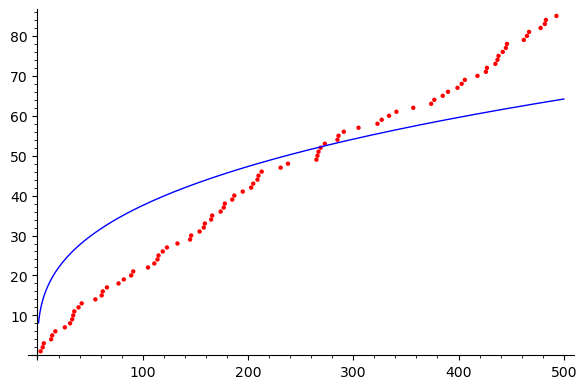

In [8]:
plt = plot([])
var('a')
model(x) = a*x^(1/3)
sol = find_fit(plot_d, model)
show(sol)
f(x) = model(a = sol[0].rhs())
plt += list_plot(plot_d, color = 'red')
plt += plot(f(x), x, [1,D])
show(plt)


In [3]:
def classNumber(K):
    P.<x> = QQ[]
    K.<theta_K> = NumberField(P(K))
    return str(K.class_number())

with pd.option_context('display.max_rows', int(7000)):
    df = dfs[2]
    print(df.groupby(['j_deg', 'cm']).size())
    #df = df[df.groupby('K')['j_deg'].transform('min') > 1]
    df['classnumber'] = df.apply(lambda x: classNumber(x.K), axis = 'columns')
    display(df)




    
    

j_deg  cm   
1      False    1201
       True     2296
2      False     694
       True       12
dtype: int64


<ipython-input-3-4ec52ab6a6a6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classnumber'] = df.apply(lambda x: classNumber(x.K), axis = 'columns')


,Unnamed: 0,Unnamed: 0.1,K,d,r,s,D_K,A,B,j,j_deg,gmm,cm,ram,classnumber
14,14,14,x^2 - x - 7,2,2,0,29,80*theta_K - 752/3,17920/27*theta_K - 56192/27,x^2 + 18891*x - 357911,2,True,False,1,1
15,15,15,x^2 - x - 7,2,2,0,29,-80*theta_K - 512/3,-17920/27*theta_K - 38272/27,x^2 + 18891*x - 357911,2,True,False,1,1
16,16,16,x^2 - x - 7,2,2,0,29,-5760*theta_K - 38032/3,-3745280*theta_K - 221723008/27,x^2 + 7580312864451*x + 144612187806169,2,True,False,1,1
17,17,17,x^2 - x - 7,2,2,0,29,-6480*theta_K - 42752/3,-12597760/27*theta_K - 27649408/27,x^2 + 7580312864451*x + 144612187806169,2,True,False,1,1
26,26,26,x^2 - x - 10,2,2,0,41,-272/3,-8192/27*theta_K - 13184/27,x^2 - 314432*x - 24137569,2,True,False,1,1
27,27,27,x^2 - x - 10,2,2,0,41,-17/3,128/27*theta_K - 334/27,x^2 - 314432*x - 24137569,2,True,False,1,1
28,28,28,x^2 - x - 10,2,2,0,41,-25*theta_K - 227/3,-3530/27*theta_K - 9530/27,x^2 - 264706*x + 454756609,2,True,False,1,1
29,29,29,x^2 - x - 10,2,2,0,41,-322745*theta_K - 2615747/3,130438870/27*theta_K + 352388710/27,x^2 - 264706*x + 454756609,2,True,False,1,1
30,30,30,x^2 - x - 10,2,2,0,41,1290455*theta_K + 10458733/3,1043312902/27*theta_K + 2818574614/27,x^2 - 68765615552*x + 118740008189951,2,True,False,1,1
31,31,31,x^2 - x - 10,2,2,0,41,-27735*theta_K - 224782/3,-4498674*theta_K - 328143076/27,x^2 - 68765615552*x + 118740008189951,2,True,False,1,1
